In [17]:
%pylab inline
import SimpleITK as sitk
import numpy as np
from copy import deepcopy

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [11]:
def region_growing(image, seed,threshold):
    region=np.zeros_like(image)   
    # Creo una matrice di booleani che indica quali pixel soddisfano il criterio 
    mask=np.abs(image-seed)<=threshold 
    region[mask]=image[mask]
    #assegno gli elementi dell'immagine che si trovano in corrispondenza dei true, alla regione di zeri
    return region


In [12]:
brain_sitk=sitk.ReadImage("DATA/MRBrainTumor1.nrrd")
brain=sitk.GetArrayFromImage(brain_sitk)
brain72=brain[72,:,:] #seleziono solo la slice 72 in cui è ben visibile la massa

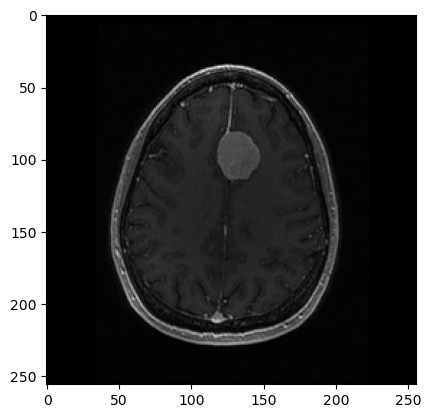

In [13]:
imshow(brain72,cmap="gray") #mostro la slice 72

In [14]:
brain72.shape #dimensioni dell'immagine


(256, 256)

In [15]:
seed=brain_sitk.GetPixel(132,92,72) #ottengo il valore di intensità pixel seed posizionato in prossimità 
                                    #del centro della massa

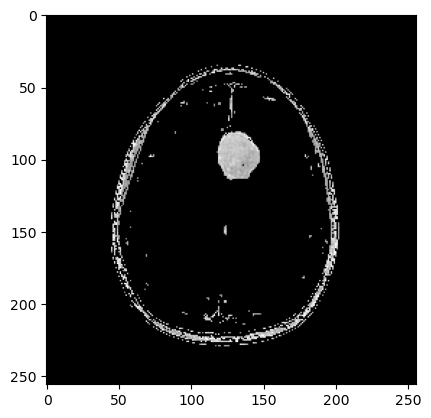

In [16]:
# Applica l'algoritmo di region growing fornisco al metodo l'immagine da segmentare, il seed e la soglia 
brain_segmentato=region_growing(brain72, seed,50)
imshow(brain_segmentato,cmap="gray")